<center><img src = "Images/ATU_Logo.jpg"></center>

<h2 style="color: #001a79;">Author: Sam Tracey</h2>
<h2 style="color: #001a79;">Module: Machine Learning and Statistics</h2>
<h2 style="color: #001a79;">Topic 2. Models.</h2>

<hr style="border-top: 1px solid #001a79;" />



In [1]:
# Importing Necessary Modules
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nicer colours and styles for plots.
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 80

In [2]:
# Create some fake data representing weight and distance
# Use seed to generate redictable random numbers.
np.random.seed(0)
# Independent variable - weight.
weight = np.arange(0.0, 21.0, 1.0)

# Dependent variable - distance with random noise added.
distance = 5.0 * weight + 10.0 + np.random.normal(0.0, 2.0, weight.size)

In [3]:
# Look at the weight values.
weight

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [4]:
# Look at the distance values.
distance

array([ 13.52810469,  15.80031442,  21.95747597,  29.4817864 ,
        33.73511598,  33.04544424,  41.90017684,  44.69728558,
        49.7935623 ,  55.821197  ,  60.28808714,  67.90854701,
        71.52207545,  75.24335003,  80.88772647,  85.66734865,
        92.98815815,  94.58968347, 100.6261354 , 103.29180852,
       104.89402037])

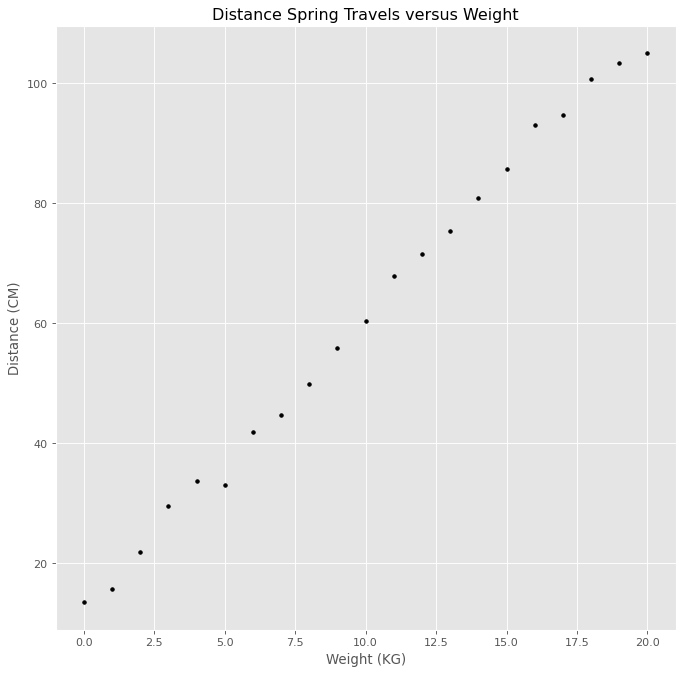

In [5]:
# Create the plot.

plt.plot(weight, distance, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

<h3 style="color: rgb(0, 91, 94);">Minimising the cost</h3>

For our given data set we can plot the cost value/function.


$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$



In [6]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(weight)
d_avg = np.mean(distance)

# Subtract means from w and d.
w_zero = weight - w_avg
d_zero = distance - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.815516 and c is 12.686140.


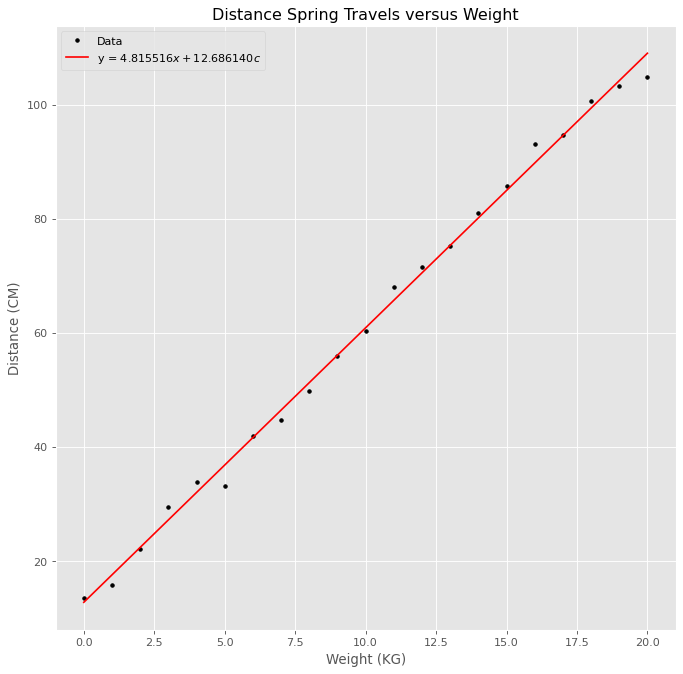

In [7]:
# Plot w versus d with black dots.
plt.plot(weight, distance, 'k.', label="Data")

# Overlay best fitted line based on m and c calculated above.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"y = $4.815516x + 12.686140c$")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

In [8]:
# Using Numpy to calculate best m and c values.
np.polyfit(weight, distance, 1)

array([ 4.8155165, 12.68614  ])

In [9]:
# Create cost function.
cost = lambda m,c: np.sum([(distance[i] - m * weight[i] - c)**2 for i in range(weight.size)])
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.82 and c = 12.69:    68.76


<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />


Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<h3 style="color: #001a79;">The Absolute Value Function</h3>



The first graph below shows the parent absolute value function y=|x|. Each function family has a parent function. The is the simplest version of the function family and shows the features of that family. The key characteristic of the absolute value function is the distinct v shape. This shape indicates the function involves taking the absolute value. The point where the graph changes direction, at the bottom of the v for the parent function. When it is at the bottom like this, it is called a minimal vertex. If the vertex is at the top, it is called a maximal vertex.

The General form of an absolute value equation is:

$$f(x)=a∣x−h∣+k$$

<br>
The variable $a$ tells us how far the graph stretches vertically, and whether the graph opens up or down. The variables $h$ and $k$ tell us how far the graph shifts horizontally and vertically.

In [10]:
# Create array with both negative and positive integers.
x = np.random.randint(-20, 20, 100)

In [11]:
# Create arrays based on various Absolute Value Functions.
y = abs(x)
y1 = abs(x-1)+5
y2 = -2*abs(x)+4

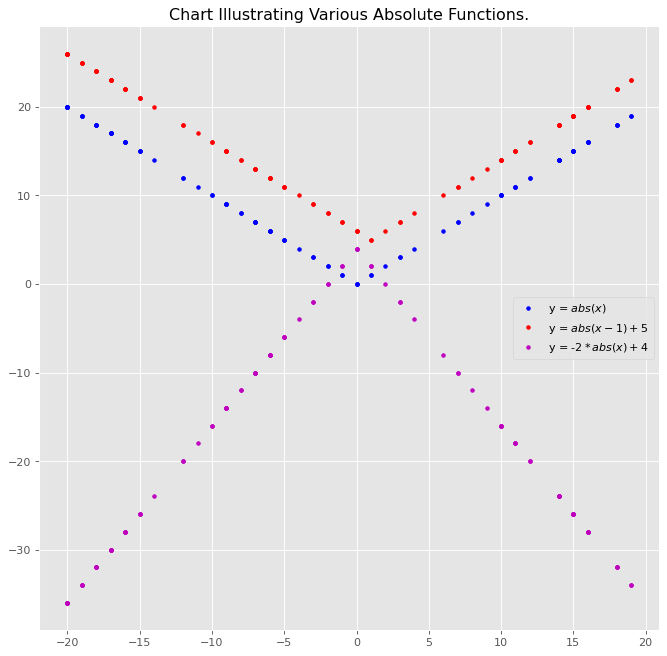

In [12]:
# Create the plot.

plt.plot(x, y, 'b.', label=r"y = $abs(x)$")
plt.plot(x, y1, 'r.', label=r"y = $abs(x-1)+5$")
plt.plot(x, y2, 'm.', label=r"y = -$2*abs(x)+4$")

plt.legend()
# Set some properties for the plot.

plt.title('Chart Illustrating Various Absolute Functions.')


# Show the plot.
plt.show()

<h3 style="color: #001a79;">Common Loss Functions and Evaluation Metrics in Machine Learning for Regression.</h3>


Mean Absolute Error (MAE) is less biased for large errors / outliers but may not adequately represent larger errors.
<br>

$$MAE: \sum_{i=1}^{D}|x_i-y_i|$$
<br>
Mean Squared Error (MSE) is highly biased for large errors and outliers.
<br>
$$MSE: \sum_{i=1}^{D}(x_i-y_i)^2$$

In [13]:
# Create two arrays.
true = [244, 255, 311, 291, 407, 323, 431, 319, 380, 266]
predicted = [248, 276, 340, 285, 403, 325, 400, 322, 387, 300]

In [14]:
# Define a Mean Absolute Error Function.
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [15]:
# Call mae function and print result.
print(f'Mean Absolute Error = {mae(true, predicted)}')

Mean Absolute Error = 14.1


In [16]:
#Calculate and display MSE
mse = np.square(np.subtract(true, predicted)).mean()
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 352.9


In [17]:
# Change the first value in predicted array to be an outlier.
predicted[0] = 400

In [18]:
print(f'Mean Absolute Error = {mae(true, predicted)}')

Mean Absolute Error = 29.3


In [19]:
#Calculate and display MSE
mse = np.square(np.subtract(true, predicted)).mean()
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 2784.9


Notice above that the addition of one outlier increased the MSE metric much more drammatically than the MAE metric.

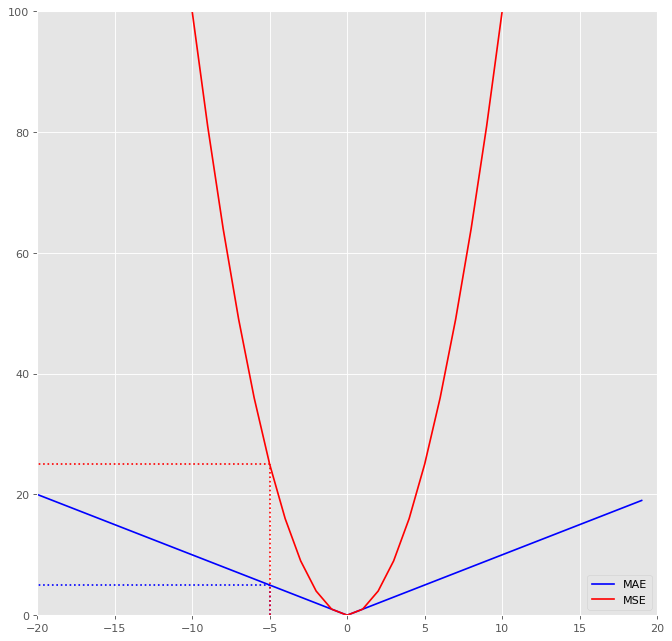

In [20]:
# Plotting the MAE and MSE loss functions.
# Define x.
x = np.arange(-20, 20, 1)
# Mean Absolute Error
y_mae = np.abs(x)


# Mean Square Error
y_mse = np.square(x)

plt.plot(x, y_mae, "blue", label="MAE")
plt.plot(x, y_mse, "red", label="MSE")

# Plot the intersection of -5 absolute value with respect to loss function.
plt.plot([-5, -5], [0, 5], 'b:')
plt.plot([-5, -20], [5, 5], 'b:')


# Plot the intersection of -5 MSE value with respect to loss function.
plt.plot([-5, -5], [0, 25], 'r:')
plt.plot([-5, -20], [25, 25], 'r:')

plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-20, 20, 0, 100])
plt.show()

<h3 style="color: #001a79;">Common Loss Functions and Evaluation Metrics in Machine Learning for Regression.</h3>


As we have learned in this topic, the goal in linear regression is to fit the best line which *minimises the Cost function.*<br>

The cost function being:<br> $$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

When Mean Squared Error is used, optimization of the Cost function can be performed using calculus.<br>
First we calculate the partial derivatives then set to zero and finally solve the simultaneous equations.<br>

The problem we face when using Mean Absolute Error is that |x| is not differentiable at x = 0.<br>
<br>

Consider the following example where we are trying to find<br>
$$\lim_{h\to0}\frac{f(0+h)-f(0)}{h}\quad\text{where }f(x)=|x|$$<br>
$$\lim_{h\to0}\frac{|0+h|-|0|}{h}$$<br>
$$=\lim_{h\to0}\frac{|h|}{h}$$<br>
<br>
Find the right limit:<br>
$$=\lim_{h\to0}\frac{|h|}{h}$$<br>
Since $h > 0$ <br>
$$=\lim_{h\to0^+}\frac{h}{h}=1$$<br>
<br>
We then find the left limit:<br>
$$=\lim_{h\to0^-}\frac{|h|}{h}$$<br>
and since $h < 0$ <br>
$$=\lim_{h\to0^-}\frac{-h}{h}=-1$$<br>
<br>
Since the left and right limits are not the same, the limit does not exist.<br>
<br>
A way to visualize this is to consider the two absolute value functions in the following plots.


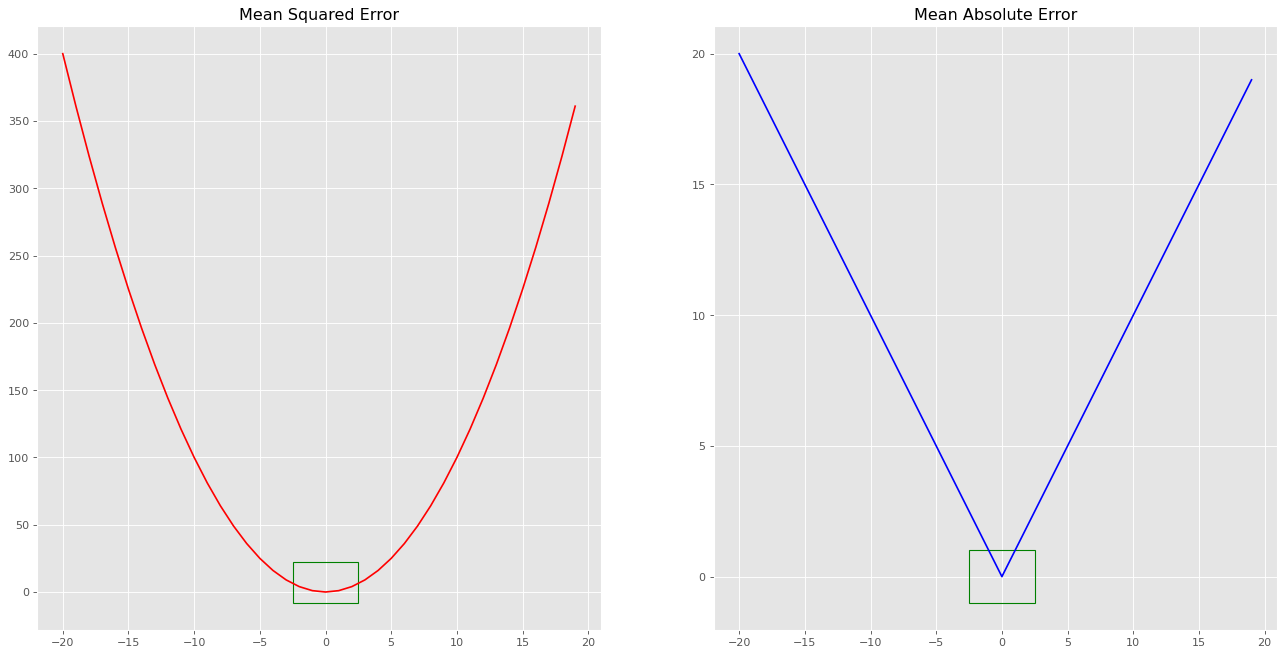

In [43]:
import matplotlib.patches as patches
# Plotting the MSE loss functions.
# Define x.
x = np.arange(-20, 20, 1)

# Mean Square Error
y_mse = np.square(x)

# Mean Absolute Error
y_mae = np.abs(x)

# Create a Rectangle patch
rect1 = patches.Rectangle((-2.5, -8), 5, 30, linewidth=1, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((-2.5, -1), 5, 2, linewidth=1, edgecolor='g', facecolor='none')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(x, y_mse, "red", label="MSE")
axes[0].set_title("Mean Squared Error")
axes[0].add_patch(rect1)
axes[1].plot(x, y_mae, "blue", label = "MAE")
axes[1].set_title("Mean Absolute Error")
axes[1].add_patch(rect2)
plt.show()

When we look at the Mean Squared Error function as it approaches zero, you will notice that there is a smooth transition from a downward descent to an upward descent. With the Mean Absolute error on the other habdm there is an abrupt change in direction. If we zoomed in really closely at the 0,0 point in the Mean Squared Error function it would look for all intents and purposes like a striaght line. With the Mean Absolute error you would never see a straight line at 0,0. If a fucntion is differentiable, it should look like a straight line when you zoom in far enough. (reference: https://math.stackexchange.com/questions/991475/why-is-the-absolute-value-function-not-differentiable-at-x-0)

***
### End of Notebook